Task 2: Customer Preference Analysis

Task list:

1. Analyze the relationship between the type of cuisine and the restaurant's rating.

2. Identify the most popular cuisines among customers based on the number of votes.

3. Determine if there are any specific cuisines that tend to receive higher ratings.

1. Analyzing the relationship between the type of cuisine and the restaurant's rating.

In this section, I will be using scatter plot to study how the cusines relatest with the average aggregate ratings of customers as well as assessing the distribution of the cuisines with their respective ratings

In [20]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
new_data = pd.read_csv('new_data.csv')

In [3]:
new_data['Cuisines'].nunique()

1825

In [10]:
# Extracting Average aggregate rating based on cuisines and restaurant name
cuisine_dist = new_data.groupby(['Cuisines', 'Restaurant Name'])['Aggregate rating'].mean()
cuisine_dist = cuisine_dist.reset_index(name='Average Aggregate rating').sort_values(ascending = False, by='Average Aggregate rating')
cuisine_dist

,Cuisines,Restaurant Name,Average Aggregate rating
3759,Japanese,Marukame Udon,4.9
2429,"Continental, Indian",AB's Absolute Barbecues,4.9
7281,"Pizza, Sandwich",Ingleside Village Pizza,4.9
5230,North Indian,The Great Indian Pub,4.9
4362,"Mughlai, Lucknowi",Grandson of Tunday Kababi,4.9
...,...,...,...
945,Biryani,Shahi Muradabadi Chicken Biryani,0.0
947,Biryani,Shama Muradabadi Chicken Corner,0.0
948,Biryani,Special Chicken Biryani,0.0
5010,North Indian,Punjabi Special,0.0


There are 1825 unique cuisines and 7940 observations on the cuisines based on the restaurant's rating.  This presents a unique challenge due to the large number of categories.
For this reason, I will make a study on the first 20 cuisines (0-20) with the highest Average Aggregate rating based on the Restaurant Name as well as the last 20 (7920-7941).

In [18]:
# Extracting the first 20 data
first_20_rating = cuisine_dist[0:20]
first_20_rating = first_20_rating.reset_index()
first_20_rating.head(5)

,index,Cuisines,Restaurant Name,Average Aggregate rating
0,3759,Japanese,Marukame Udon,4.9
1,2429,"Continental, Indian",AB's Absolute Barbecues,4.9
2,7281,"Pizza, Sandwich",Ingleside Village Pizza,4.9
3,5230,North Indian,The Great Indian Pub,4.9
4,4362,"Mughlai, Lucknowi",Grandson of Tunday Kababi,4.9


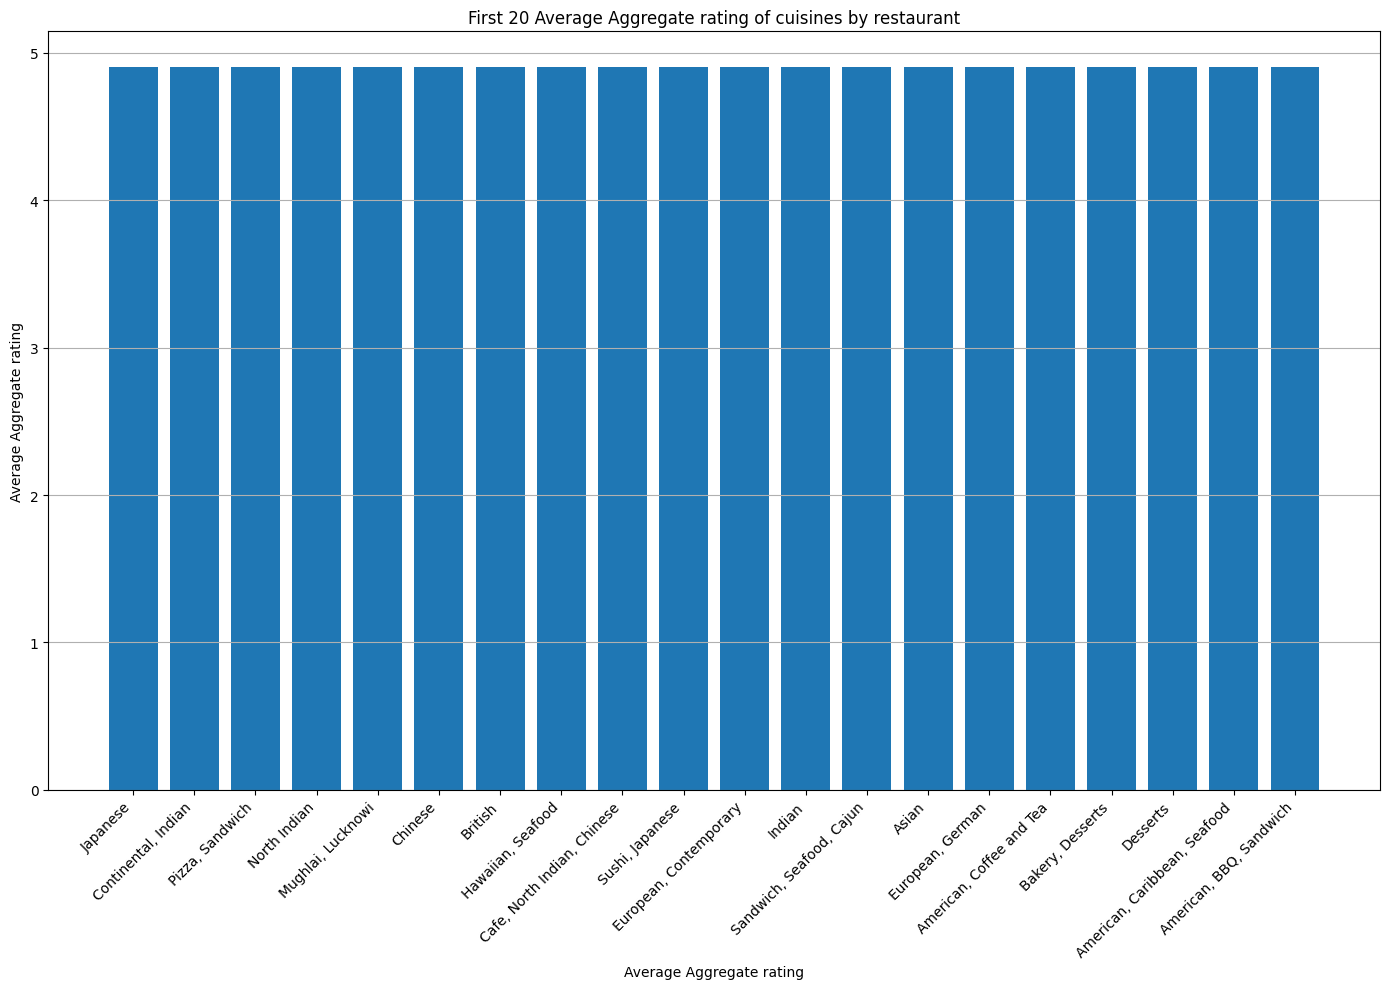

In [26]:
# Graphical distribution of the first 20 cuisines and their aggregate rating

plt.figure(figsize=(14, 10))
plt.bar(first_20_rating['Cuisines'], first_20_rating['Average Aggregate rating'])

plt.xlabel('Average Aggregate rating')
plt.ylabel('Average Aggregate rating')
plt.title('First 20 Average Aggregate rating of cuisines by restaurant')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [30]:
# Extracting the last 20 data
last_20_rating = cuisine_dist[7920:7941]
last_20_rating = last_20_rating.reset_index()
last_20_rating.head(5)

,index,Cuisines,Restaurant Name,Average Aggregate rating
0,6549,"North Indian, Mughlai",Iqbal's Mughal Cuisine,0.0
1,937,Biryani,Kolkata Biriyani On Call,0.0
2,938,Biryani,Mr. Biryani Walia,0.0
3,939,Biryani,Muskan Chicken Biryani,0.0
4,5003,North Indian,Punjabi Flavour,0.0


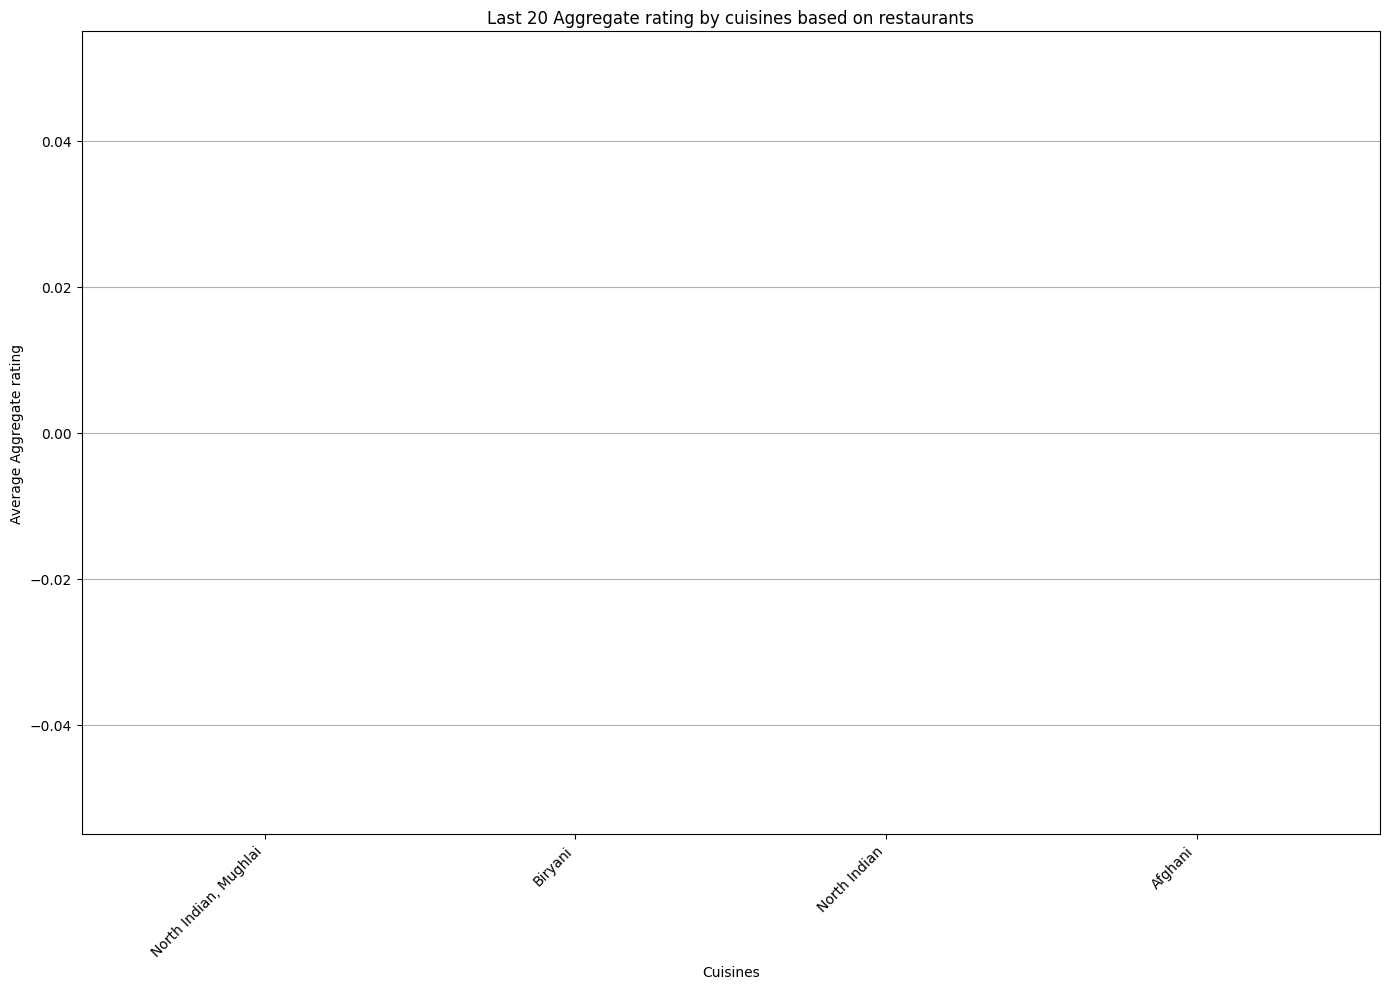

In [27]:
# Graphical distribution of the last 20 cuisines and their aggregate rating

plt.figure(figsize=(14, 10))
plt.bar(last_20_rating['Cuisines'], last_20_rating['Average Aggregate rating'])

plt.xlabel('Cuisines')
plt.ylabel('Average Aggregate rating')
plt.title('Last 20 Aggregate rating by cuisines based on restaurants')
plt.xticks(rotation = 45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [36]:
# Extracting records with zero ratings
zero_ratings = cuisine_dist[cuisine_dist['Average Aggregate rating']==0]
zero_ratings = zero_ratings.reset_index()
zero_ratings

,index,Cuisines,Restaurant Name,Average Aggregate rating
0,7226,"Pizza, Fast Food",Jeet Pizza,0.0
1,4496,North Indian,Anupam Eating Point,0.0
2,616,"Bakery, Desserts",Me and My Cake,0.0
3,3285,Finger Food,London Eye - The Open Lounge,0.0
4,4399,"Mughlai, North Indian",Sufiya Hotel,0.0
...,...,...,...,...
1875,945,Biryani,Shahi Muradabadi Chicken Biryani,0.0
1876,947,Biryani,Shama Muradabadi Chicken Corner,0.0
1877,948,Biryani,Special Chicken Biryani,0.0
1878,5010,North Indian,Punjabi Special,0.0


The cusines "North Indian, Mughlai, Biryani, and Afghani" having 0 aggregate rating are not the only cusines with such rating, the total number of cusines with such rating is 1880.  So there are 1876 more cusines with 0 rating.

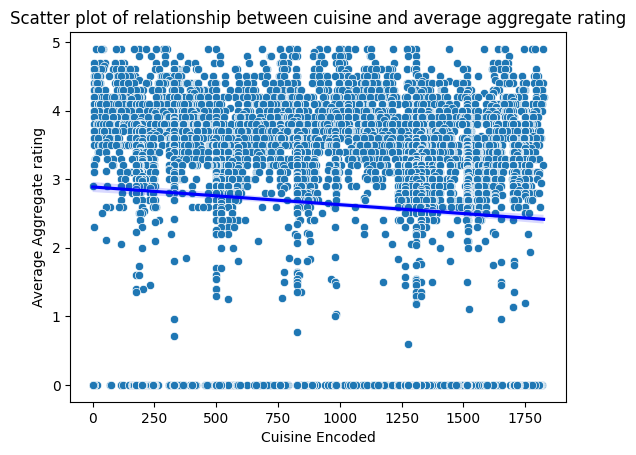

In [40]:
# Studying the relationship using a scatter plot

from sklearn.preprocessing import LabelEncoder

cuisine_dist['Cuisines Encoded'] = LabelEncoder().fit_transform(cuisine_dist['Cuisines'])

sns.scatterplot(x='Cuisines Encoded', y='Average Aggregate rating', data=cuisine_dist)

sns.regplot(x='Cuisines Encoded', y='Average Aggregate rating', data=cuisine_dist, scatter=False, color='blue')

plt.xlabel('Cuisine Encoded')
plt.ylabel('Average Aggregate rating')
plt.title('Scatter plot of relationship between cuisine and average aggregate rating')

plt.show()

The summary here is that all the cuisines have their fair share of the different levels of average aggregate rating.  However, the are more concentration of average aggregate rating above 3 but business wise, the lower mean aggregate rating shouldn't go unnoticed.

2. Identifying the most popular cuisines among customers based on the number of votes.

In [48]:
popular_cuisines_byVotes = new_data.groupby('Cuisines')['Votes'].sum().reset_index(name='Total Votes').sort_values(ascending=False, by='Total Votes')
popular_cuisines_byVotes.head(10)

,Cuisines,Total Votes
1514,"North Indian, Mughlai",53747
1306,North Indian,46241
1329,"North Indian, Chinese",42012
331,Cafe,30657
497,Chinese,21925
1520,"North Indian, Mughlai, Chinese",20115
828,Fast Food,17852
1699,South Indian,16433
1288,"Mughlai, North Indian",15275
1031,Italian,14799


The top 10 popular cuisines based on the number of votes are "North Indian, Mughlai", North Indian, "North Indian, Chinese", Cafe, Chinese, "North Indian, Mughlai, Chinese", Fast Food, "South Indian", "Mughlai, North Indian", and Italian

3. Discovering cuisines with higher ratings

In [60]:
# Getting the cuisines with higher ratings without aggregating

higher_rating_cuisines = new_data[['Cuisines', 'Restaurant Name', 'Aggregate rating']]
higher_rating_cuisines = higher_rating_cuisines.sort_values(ascending=False, by='Aggregate rating')
higher_rating_cuisines.head(10)

,Cuisines,Restaurant Name,Aggregate rating
1381,"Mexican, American, Healthy Food",Caterspoint,4.9
589,"Continental, Indian",AB's Absolute Barbecues,4.9
374,"Burger, Bar Food, Steak",McGuire's Irish Pub & Brewery,4.9
9303,Desserts,Miann,4.9
9299,Desserts,Milse,4.9
9296,"Sunda, Indonesian",Talaga Sampireun,4.9
50,"Brazilian, Bar Food",Garota de Ipanema,4.9
9291,"Sunda, Indonesian",Talaga Sampireun,4.9
48,"Brazilian, Bar Food",Braseiro da Gvea,4.9
428,"Hawaiian, Seafood",Mama's Fish House,4.9


This aspect of the analysis is centered on the cuisines served by a specific restaurant having the highest rating overall.  The essence of this analysis is to factor out the highest aggregate rating based on individual restaurant from a given cuisine they served that gave that rating from the respective customers.

In [68]:
# Getting the cuisines with higher ratings while aggregating

aggregate_higher_rating_cuisines = new_data[['Cuisines', 'Restaurant Name', 'Aggregate rating']].groupby(['Cuisines', 'Restaurant Name'])['Aggregate rating'].mean().reset_index(name='Average Aggregate rating').sort_values(ascending=[False, True, True], by=['Average Aggregate rating', 'Restaurant Name', 'Cuisines'])
aggregate_higher_rating_cuisines.head(10)

,Cuisines,Restaurant Name,Average Aggregate rating
6285,"North Indian, European, Mediterranean",AB's - Absolute Barbecues,4.9
2429,"Continental, Indian",AB's Absolute Barbecues,4.9
7340,"Sandwich, Seafood, Cajun",Atlanta Highway Seafood Market,4.9
7864,"Taiwanese, Street Food",Bao,4.9
1005,"Brazilian, Bar Food",Braseiro da Gvea,4.9
556,"Bakery, Desserts",CakeBee,4.9
3509,Indian,Carnival By Tresind,4.9
3981,"Mexican, American, Healthy Food",Caterspoint,4.9
2701,"European, Contemporary",Cube - Tasting Kitchen,4.9
846,Bar Food,Draft Gastro Pub,4.9


This aspect of the analysis is centered on the cusines and respective restaurants serving those cuisines and the individual customers they served.  In as much as customer preferences differs, so also will be the rating.  In this analysis both the cuisines and the restaurant name were grouped should different customers experience same cuisine in the same restaurant but yet haing a different rating.  The essence of this analysis is to factor out the highest aggregate rating based on the overall joint cuisines' experience of the different customers with the respective restaurants they patronized

In [72]:
# Generating number of counts for each group of cuisines and restaurant name
aggregate_higher_rating_cuisines2 = new_data[['Cuisines', 'Restaurant Name', 'Aggregate rating']].groupby(['Cuisines', 'Restaurant Name'])['Aggregate rating'].value_counts()
aggregate_higher_rating_cuisines2 = aggregate_higher_rating_cuisines2.reset_index(name='single count')
aggregate_higher_rating_cuisines2 = aggregate_higher_rating_cuisines2.sort_values(ascending=[False, False, True, True], by=['Aggregate rating', 'single count', 'Restaurant Name', 'Cuisines'])
aggregate_higher_rating_cuisines2

,Cuisines,Restaurant Name,Aggregate rating,single count
8781,"Sunda, Indonesian",Talaga Sampireun,4.9,3
3062,"European, Mediterranean, North Indian",AB's - Absolute Barbecues,4.9,2
6038,"North Indian, Chinese",Barbeque Nation,4.9,2
6991,"North Indian, European, Mediterranean",AB's - Absolute Barbecues,4.9,1
2742,"Continental, Indian",AB's Absolute Barbecues,4.9,1
...,...,...,...,...
8841,Tibetan,Zawlbuk,0.0,1
5986,"North Indian, Biryani",Zayka chicken restaurant,0.0,1
2444,"Chinese, North Indian",Zombiez,0.0,1
6846,"North Indian, Chinese, South Indian, Fast Food",deliKitchen,0.0,1


In [84]:
# Checking observations with 3 count appearances

filtered_data = new_data[
    (new_data['Cuisines'] == 'Sunda, Indonesian') &
    (new_data['Restaurant Name'] == 'Talaga Sampireun')
]
filtered_data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9279,7422633,Talaga Sampireun,94,Jakarta,Jl. Lingkar Luar Barat,Cengkareng,"Cengkareng, Jakarta",106.728508,-6.168467,"Sunda, Indonesian",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.9,Dark Green,Excellent,1662
9291,7417455,Talaga Sampireun,94,Jakarta,"Taman Impian Jaya Ancol, Jl. Lapangan Golf 7, ...","Taman Impian Jaya Ancol, Ancol","Taman Impian Jaya Ancol, Ancol, Jakarta",106.833553,-6.126860,"Sunda, Indonesian",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.9,Dark Green,Excellent,1640
9296,7417450,Talaga Sampireun,94,Tangerang,"Jl. Boulevard Bintaro Jaya Blok B7/N1, Bintaro...",Pondok Aren,"Pondok Aren, Tangerang",106.726119,-6.269914,"Sunda, Indonesian",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.9,Dark Green,Excellent,2212


This is just a further exploration example to show where the same restaurant in the same city had multiple customer experience on the same cuisine which can be analyzed separately although not the case here since the addresses are different.  However, the frequency of unique customer experience is very minimal (just 3 and 2) as dispplayed above, hence, the analysis on this exploration may not be necessary.  instead, the analysis on the first exploration is sufficient enough to highlight the cusines with the highest rating.